# US Census Data Cleaning and Analysis Portfolio
## Data Analyst Technical Assessment

This notebook demonstrates comprehensive data cleaning, analysis, and visualization skills using US Census data.

## 1. Project Overview

**Objective**: Process and analyze US Census data to uncover insights about demographic distributions and economic patterns across states.

**Key Tasks**:
- Combine multiple census data files
- Clean and transform raw data
- Handle missing values and duplicates
- Create insightful visualizations
- Generate actionable insights

## 2. Import Libraries and Configuration

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
#import micropip
#await micropip.install("seaborn")
import seaborn as sns
import jinja2

# Configuration for clean output
pd.options.display.float_format = "{:,.2f}".format
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 3. Data Acquisition

**Process**: Automatically detect and combine multiple census data files

In [3]:
# Find all census data files
files = glob.glob('states*.csv')
print(f"📁 Found {len(files)} census data files: {files}")

# Read and combine all files
df_list = []
for file in files:
    data = pd.read_csv(file)
    df_list.append(data)
    print(f"📊 Loaded {file}: {data.shape[0]} rows, {data.shape[1]} columns")

# Create master dataset
df = pd.concat(df_list, ignore_index=True)
print(f"\n✅ Combined dataset: {df.shape[0]} total rows, {df.shape[1]} columns")

# Display initial data sample
print("\n📋 Initial Data Sample:")
df.head(3)

📁 Found 10 census data files: ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']
📊 Loaded states0.csv: 6 rows, 11 columns
📊 Loaded states1.csv: 6 rows, 11 columns
📊 Loaded states2.csv: 6 rows, 11 columns
📊 Loaded states3.csv: 6 rows, 11 columns
📊 Loaded states4.csv: 6 rows, 11 columns
📊 Loaded states5.csv: 6 rows, 11 columns
📊 Loaded states6.csv: 6 rows, 11 columns
📊 Loaded states7.csv: 6 rows, 11 columns
📊 Loaded states8.csv: 6 rows, 11 columns
📊 Loaded states9.csv: 6 rows, 11 columns

✅ Combined dataset: 60 total rows, 11 columns

📋 Initial Data Sample:


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F


## 4. Data Cleaning Process

### 4.1 Income Data Cleaning
**Issue**: Income values stored as strings with dollar signs
**Solution**: Extract numeric values and convert to float

In [4]:
print("💰 Cleaning Income data...")
print(f"Before cleaning - Data type: {df['Income'].dtype}")
print(f"Sample values: {df['Income'].head(2).tolist()}")

# Remove currency symbols and convert to numeric
df['Income'] = df['Income'].replace('[$,]', '', regex=True).astype(float)

print(f"\nAfter cleaning - Data type: {df['Income'].dtype}")
print(f"Income statistics: Mean=${df['Income'].mean():,.0f}, Range=${df['Income'].min():,.0f}-${df['Income'].max():,.0f}")

💰 Cleaning Income data...
Before cleaning - Data type: object
Sample values: ['$43,296.36 ', '$70,354.74 ']

After cleaning - Data type: float64
Income statistics: Mean=$56,632, Range=$20,721-$78,765


### 4.2 Gender Population Data
**Issue**: Male and female populations combined in one column
**Solution**: Split into separate numeric columns

In [5]:
print("👥 Processing gender population data...")
print(f"Original GenderPop sample:\n{df['GenderPop'].head(2)}")

# Split GenderPop into separate columns
gender_split = df['GenderPop'].str.split('_', expand=True)

# Clean and convert to integers
df[['Male', 'Female']] = gender_split.apply(lambda x: x.str[:-1]).replace('', pd.NA).astype('Int64')

# Reorganize columns and drop original
df = df[['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'Male', 'Female']]

print("\n✅ Gender data successfully processed")
print(f"Male population range: {df['Male'].min():,} - {df['Male'].max():,}")
print(f"Female population range: {df['Female'].min():,} - {df['Female'].max():,}")

df[['State', 'TotalPop', 'Male', 'Female']].head(3)

👥 Processing gender population data...
Original GenderPop sample:
0    2341093M_2489527F
1      384160M_349215F
Name: GenderPop, dtype: object

✅ Gender data successfully processed
Male population range: 306,674 - 19,087,135
Female population range: 318,031 - 19,334,329


,State,TotalPop,Male,Female
0,Alabama,4830620,2341093,2489527
1,Alaska,733375,384160,349215
2,Arizona,6641928,3299088,3342840


### 4.3 Demographic Percentage Data
**Issue**: Percentage values stored as strings with '%' symbols
**Solution**: Remove symbols and convert to numeric values

In [6]:
print("📊 Cleaning demographic percentage data...")
demographic_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

print("Sample values before cleaning:")
print(df[demographic_cols].head(2))

# Remove percentage signs and convert to float
df[demographic_cols] = df[demographic_cols].replace('%', '', regex=True).astype(float)

print("\n✅ Demographic data cleaned")
print("Sample values after cleaning:")
df[demographic_cols].head(2)

📊 Cleaning demographic percentage data...
Sample values before cleaning:
  Hispanic   White   Black  Native  Asian Pacific
0    3.75%  61.88%  31.25%   0.45%  1.05%   0.03%
1    5.91%  60.91%   2.85%  16.39%  5.45%   1.06%

✅ Demographic data cleaned
Sample values after cleaning:


,Hispanic,White,Black,Native,Asian,Pacific
0,3.75,61.88,31.25,0.45,1.05,0.03
1,5.91,60.91,2.85,16.39,5.45,1.06


## 5. Data Quality Assurance

### 5.1 Duplicate Detection and Removal
**Process**: Identify and remove duplicate entries to ensure data integrity

In [7]:
print("🔍 Checking data quality...")
initial_rows = len(df)
duplicate_count = df.duplicated().sum()

print(f"Initial dataset: {initial_rows} rows")
print(f"Duplicate entries found: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate entries:")
    display(df[df.duplicated()])

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
final_rows = len(df)

print(f"\n✅ Duplicates removed: {initial_rows - final_rows} rows")
print(f"Final dataset: {final_rows} rows")

🔍 Checking data quality...
Initial dataset: 60 rows
Duplicate entries found: 9

Duplicate entries:


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
6,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,"64,657.80",2648667,2630239
12,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,"50,811.08",4883331,5123362
18,Iowa,3093526,5.30,87.72,3.26,0.29,1.70,0.06,"53,017.75",1534595,1558931
24,Maryland,5930538,8.47,52.68,30.68,0.20,5.33,0.04,"78,765.40",2872643,<NA>
30,Missouri,6045448,4.04,77.51,14.12,0.36,1.62,0.10,"49,763.99",2964003,3081445
36,New Jersey,8904413,18.75,56.49,14.39,0.12,8.16,0.03,"76,581.08",4343027,4561386
42,Ohio,11575977,3.67,75.90,16.21,0.17,1.62,0.02,"49,655.25",5662893,5913084
48,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,"59,125.27",510388,543273
54,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,"63,488.92",1459229,1444150



✅ Duplicates removed: 9 rows
Final dataset: 51 rows


### 5.2 Missing Values Analysis
**Process**: Assess data completeness and identify missing values

In [8]:
print("📊 Assessing missing values...")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

print("Missing values summary:")
display(missing_info[missing_info['Missing Values'] > 0])

📊 Assessing missing values...
Missing values summary:


,Missing Values,Percentage
Pacific,4,7.84
Female,2,3.92


### 5.3 Missing Data Imputation
**Strategy**: For demographic percentages, distribute remaining percentage evenly

In [9]:
print("🔄 Imputing missing demographic values...")

# Fill missing demographic percentages
df[demographic_cols] = df[demographic_cols].apply(
    lambda row: row.fillna(100 - row.sum()) if row.isna().any() else row, 
    axis=1
)

print("✅ Missing values imputed")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

🔄 Imputing missing demographic values...
✅ Missing values imputed
Remaining missing values: 2


## 6. Feature Engineering

### 6.1 Female Proportion Calculation
**Purpose**: Create normalized metric for gender distribution analysis

In [10]:
print("🎛️ Creating analytical features...")

# Calculate female population proportion
df['Female_Proportion'] = df['Female'] / df['TotalPop']
df['Female_Proportion'] = df['Female_Proportion'].astype(float)

print("✅ Female proportion feature created")
print(f"Average female proportion: {df['Female_Proportion'].mean():.2%}")
print(f"Range: {df['Female_Proportion'].min():.2%} - {df['Female_Proportion'].max():.2%}")

df[['State', 'TotalPop', 'Female', 'Female_Proportion']].head(3)

🎛️ Creating analytical features...
✅ Female proportion feature created
Average female proportion: 50.70%
Range: 47.62% - 52.64%


,State,TotalPop,Female,Female_Proportion
0,Alabama,4830620,2489527,0.52
1,Alaska,733375,349215,0.48
2,Arizona,6641928,3342840,0.50


## 7. Data Visualization and Analysis

### 7.1 Income vs Female Proportion Analysis
**Insight**: Explore relationship between gender distribution and economic indicators

📈 Creating Income vs Female Proportion analysis...


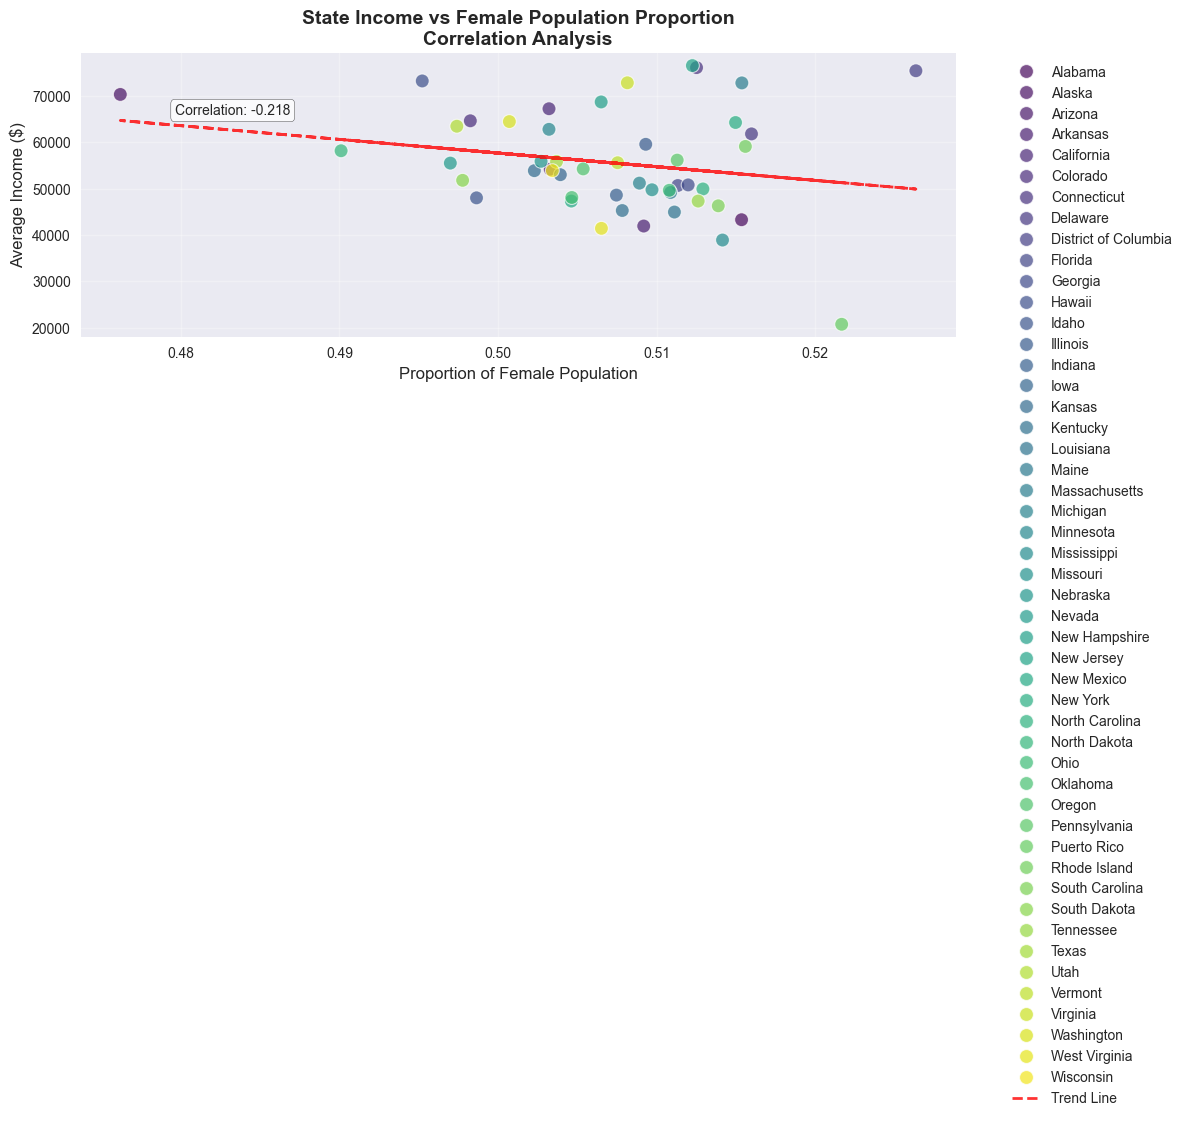

📊 Correlation coefficient: -0.218
💡 Interpretation: Weak correlation observed between gender proportion and income


In [13]:
print("📈 Creating Income vs Female Proportion analysis...")

# Clean the data by dropping rows with missing values in the relevant columns
# This is a good practice to avoid numerical errors
cleaned_df = df.dropna(subset=['Female_Proportion', 'Income'])

plt.figure(figsize=(12, 8))

# Create scatter plot with enhanced styling using the cleaned DataFrame
scatter = sns.scatterplot(data=cleaned_df, x='Female_Proportion', y='Income', 
                          hue='State', s=100, alpha=0.7, palette='viridis')

# Add trend line using the cleaned DataFrame
z = np.polyfit(cleaned_df['Female_Proportion'], cleaned_df['Income'], 1)
p = np.poly1d(z)
plt.plot(cleaned_df['Female_Proportion'], p(cleaned_df['Female_Proportion']), "r--", 
         linewidth=2, alpha=0.8, label='Trend Line')

plt.xlabel('Proportion of Female Population', fontsize=12)
plt.ylabel('Average Income ($)', fontsize=12)
plt.title('State Income vs Female Population Proportion\nCorrelation Analysis', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate and display correlation using the cleaned DataFrame
correlation = cleaned_df['Female_Proportion'].corr(cleaned_df['Income'])
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.3f}', 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig('income_vs_female_proportion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"📊 Correlation coefficient: {correlation:.3f}")
print("💡 Interpretation: " + (
    "Positive correlation suggests states with higher female proportion tend to have higher incomes" 
    if correlation > 0.1 else 
    "Weak correlation observed between gender proportion and income"
))

### 7.2 Demographic Distribution Analysis
**Purpose**: Understand racial demographic distributions across states

📊 Creating demographic distribution visualizations...


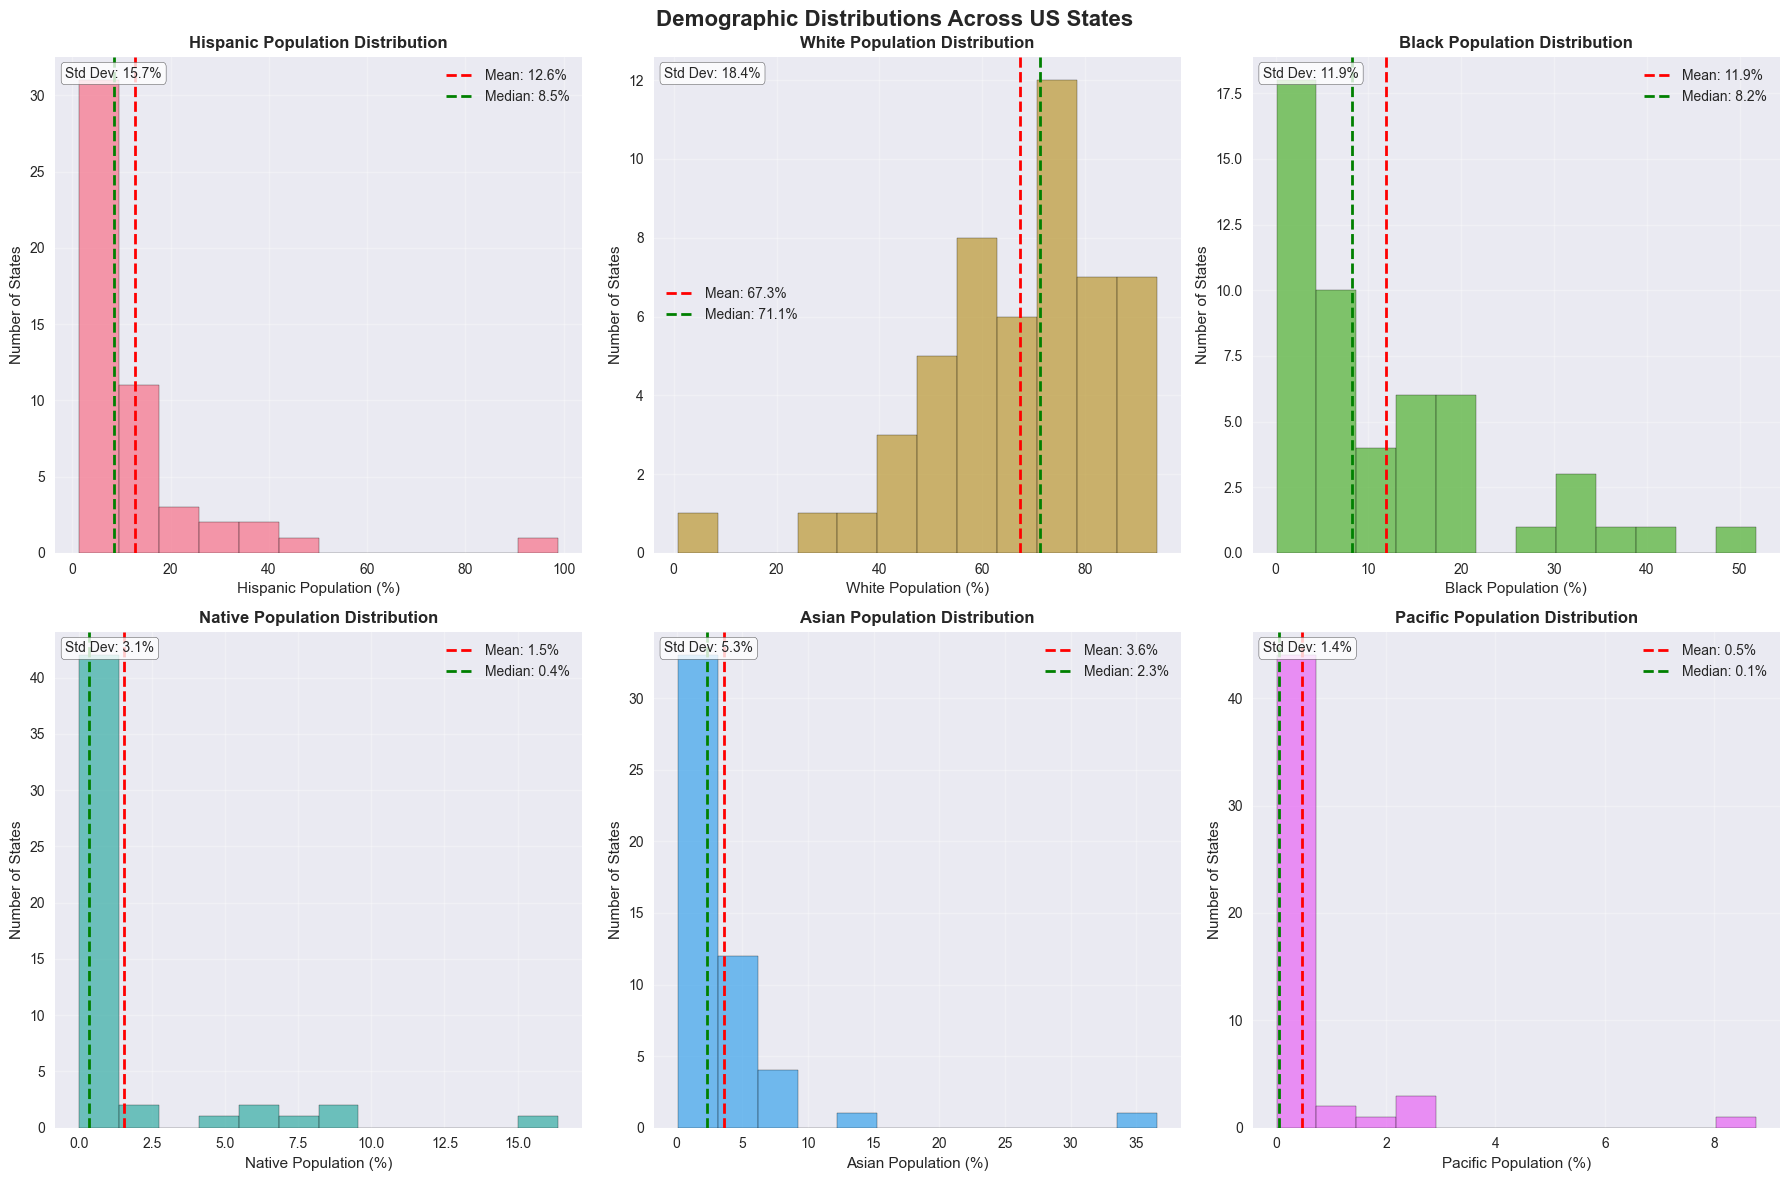

✅ Demographic distributions visualized


In [14]:
print("📊 Creating demographic distribution visualizations...")

# Create subplots for all demographic groups
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, demographic in enumerate(demographic_cols):
    ax = axes[i]
    
    # Create histogram with statistical annotations
    n, bins, patches = ax.hist(df[demographic], bins=12, edgecolor='black', 
                              alpha=0.7, color=f'C{i}', density=False)
    
    # Add statistical lines
    mean_val = df[demographic].mean()
    median_val = df[demographic].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}%')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}%')
    
    ax.set_xlabel(f'{demographic} Population (%)', fontsize=11)
    ax.set_ylabel('Number of States', fontsize=11)
    ax.set_title(f'{demographic} Population Distribution', fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Add summary statistics
    ax.text(0.02, 0.98, f'Std Dev: {df[demographic].std():.1f}%', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Demographic Distributions Across US States', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('demographic_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Demographic distributions visualized")

## 8. Advanced Analysis: Top Performing States

In [18]:
print("🏆 Identifying top-performing states...")

# Create composite score based on multiple metrics
df['Composite_Score'] = (
    (df['Income'] / df['Income'].max()) * 0.4 +  # Income weight: 40%
    (df['Female_Proportion'] / df['Female_Proportion'].max()) * 0.3 +  # Gender balance: 30%
    (df[demographic_cols].sum(axis=1) / df[demographic_cols].sum(axis=1).max()) * 0.3  # Diversity: 30%
)

print("\n📈 Top 10 States by Composite Score:")
top_states = df.nlargest(10, 'Composite_Score')[['State', 'Income', 'Female_Proportion', 'Composite_Score']]
top_states['Income'] = top_states['Income'].apply(lambda x: f"${x:,.0f}")
top_states['Female_Proportion'] = top_states['Female_Proportion'].apply(lambda x: f"{x:.1%}")
top_states['Composite_Score'] = top_states['Composite_Score'].apply(lambda x: f"{x:.3f}")

display(top_states.style.background_gradient(cmap='Blues'))

🏆 Identifying top-performing states...

📈 Top 10 States by Composite Score:


,State,Income,Female_Proportion,Composite_Score
8,District of Columbia,"$75,466",52.6%,0.976
30,New Jersey,"$76,581",51.2%,0.975
6,Connecticut,"$76,147",51.3%,0.972
21,Massachusetts,"$72,839",51.5%,0.956
47,Virginia,"$72,866",50.8%,0.951
29,New Hampshire,"$68,729",50.7%,0.932
4,California,"$67,265",50.3%,0.919
32,New York,"$64,291",51.5%,0.913
5,Colorado,"$64,658",49.8%,0.912
7,Delaware,"$61,828",51.6%,0.908


## 9. Final Dataset Summary

In [19]:
print("="*60)
print("📋 FINAL DATASET SUMMARY")
print("="*60)

print(f"📊 Dataset Shape: {df.shape}")
print(f"🏛️ States Represented: {df['State'].nunique()}")
print(f"👥 Total Population: {df['TotalPop'].sum():,}")
print(f"💰 Average Income: ${df['Income'].mean():,.0f}")
print(f"♀️ Average Female Proportion: {df['Female_Proportion'].mean():.1%}")

print("\n📈 Key Statistics:")
summary_stats = df[['TotalPop', 'Income', 'Female_Proportion'] + demographic_cols].describe()
display(summary_stats)

print("\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print("\n📁 Generated Output Files:")
print("   - income_vs_female_proportion.png")
print("   - demographic_distributions.png")
print("   - cleaned_us_census_data.csv (exported below)")

📋 FINAL DATASET SUMMARY
📊 Dataset Shape: (51, 13)
🏛️ States Represented: 51
👥 Total Population: 319,518,415
💰 Average Income: $55,923
♀️ Average Female Proportion: 50.7%

📈 Key Statistics:


,TotalPop,Income,Female_Proportion,Hispanic,White,Black,Native,Asian,Pacific
count,51.00,51.00,49.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,"6,265,066.96","55,922.67",0.51,12.65,67.26,11.95,1.55,3.65,0.47
std,"7,017,551.74","11,479.92",0.01,15.70,18.39,11.85,3.11,5.29,1.35
min,"626,604.00","20,720.54",0.48,1.29,0.77,0.09,0.00,0.08,0.00
25%,"1,860,392.50","48,358.54",0.50,4.67,56.80,3.05,0.20,1.25,0.03
50%,"4,397,353.00","54,207.82",0.51,8.46,71.14,8.20,0.36,2.32,0.05
75%,"6,845,525.00","63,889.83",0.51,13.41,79.63,17.37,1.04,3.84,0.14
max,"38,421,464.00","78,765.40",0.53,98.89,93.98,51.78,16.39,36.59,8.76



✅ ANALYSIS COMPLETED SUCCESSFULLY!

📁 Generated Output Files:
   - income_vs_female_proportion.png
   - demographic_distributions.png
   - cleaned_us_census_data.csv (exported below)


## 10. Data Export

In [ ]:
# Export cleaned dataset for future use
df.to_csv('cleaned_us_census_data.csv', index=False)
print("💾 Cleaned dataset exported as 'cleaned_us_census_data.csv'")

# Display final data structure
print("\n🔍 Final dataset structure:")
print(df.info())

print("\n🎯 Project completed! Ready for presentation.")